# Imports

In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загрузка Pandas и очистка данных

In [49]:
import pandas as pd

In [50]:
df = pd.read_csv('main_task.xls')

In [51]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [52]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(0)

In [53]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

# Работаем с Ценой

In [54]:
df['Price Range'].unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

In [55]:
df[df['Price Range'] == '$$ - $$$'].count()

Restaurant_id        18412
City                 18412
Cuisine Style        18412
Ranking              18412
Rating               18412
Price Range          18412
Number of Reviews    18412
Reviews              18412
URL_TA               18412
ID_TA                18412
dtype: int64

In [56]:
len(df['City'].unique())

31

Мы знаем, что модель не може считывать текст, имеет смысл разброс цен перевести в цифры

In [57]:
def cost_to_int(x): #число будем присуждать из количества $
    if x == '$':
        y = 1
    elif x == '$$ - $$$':
        y = 2.5
    elif x == '$$$$':
        y = 4
    else:
        y = 0
    return y

In [58]:
df['Price Range_int'] = df['Price Range'].apply(cost_to_int) #Создадим новый столб

In [59]:
df['Price Range_int'].value_counts() #проверим работу

2.5    18412
0.0    13886
1.0     6279
4.0     1423
Name: Price Range_int, dtype: int64

# Рабоатем с Городами

Гипотеза: В столицах в ресторанах оценка лучше

In [60]:
df['City'].unique()

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

In [61]:
def capital(x):

    Capitals = ['Paris','Stockholm', 'London', 'Berlin','Bratislava','Vienna', 'Rome', 'Madrid', 'Dublin', 'Brussels', 'Warsaw', 'Budapest', 'Copenhagen', 'Amsterdam', 'Lisbon', 'Prague', 'Oslo', 'Helsinki', 'Edinburgh', 'Ljubljana', 'Athens']
    if x in Capitals:
        return 1
    else:
        return 0


In [62]:
df['Capital'] = df['City'].apply(capital)

In [63]:
df[['City','Capital']].head() #Проверим, что код сработал

,City,Capital
0,Paris,1
1,Stockholm,1
2,London,1
3,Berlin,1
4,Munich,0


# 4.3 Вопросы о кухнях

Сколько типов кухонь представлено в наборе данных?

In [64]:
cuis = df['Cuisine Style']
cuis = cuis.dropna(0)
cuis.unique()

array(["['European', 'French', 'International']",
       "['Japanese', 'Sushi', 'Asian', 'Grill', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']",
       "['German', 'Central European', 'Vegetarian Friendly']", ...,
       "['Steakhouse', 'Barbecue', 'Australian', 'Argentinean', 'South American']",
       "['French', 'American', 'Cafe', 'Healthy', 'Soups']",
       "['French', 'Contemporary', 'Fusion', 'Gastropub']"], dtype=object)

In [65]:
cuises = set()
for i in cuis:
    x = i.replace('[','')
    x = x.replace(']','')
    x = x.replace("'","")
    x = x.replace(" ","")
    x = x.split(',')
    for y in x:
        cuises.add(y)

cuises

{'Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'BrewPub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun&Creole',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'CentralAmerican',
 'CentralAsian',
 'CentralEuropean',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'EasternEuropean',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'European',
 'FastFood',
 'Filipino',
 'French',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'GlutenFreeOptions',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Latin',
 'Latvian',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mid

Гипотеза: Рестораны национальной кухни имеют лучшую оценку

In [66]:
def native (x):
    French = ['Paris', 'Lyon'] 
    Sweden = ['Stockholm']
    British = ['London'] 
    German = ['Berlin', 'Munich','Hamburg']
    Portuguese = ['Oporto','Lisbon']
    Italian = ['Milan','Rome']
    Slovenian = ['Bratislava','Ljubljana']
    Austrian = ['Vienna']
    Spanish = ['Barcelona', 'Madrid']
    Scottish = ['Dublin','Edinburgh']
    Belgian = ['Brussels']
    Swiss = ['Zurich','Geneva']
    Polish = ['Warsaw','Krakow']
    Hungarian = ['Budapest']
    Danish = ['Copenhagen']
    Dutch = ['Amsterdam']
    Czech = ['Prague']
    Norwegian = ['Oslo']
    Scandinavian = ['Helsinki']
    Greek = ['Athens']
    European = ['Luxembourg'] 
    if x in French:
        return 'French'
    elif x in Sweden:
        return 'Sweden'
    elif x in British:
        return 'British'
    elif x in German:
        return 'German'
    elif x in Portuguese:
        return 'Portuguese'
    elif x in Italian:
        return 'Italian'
    elif x in Slovenian:
        return 'Slovenian'
    elif x in Austrian:
        return 'Austrian'
    elif x in Spanish:
        return 'Spanish'
    elif x in Scottish:
        return 'Scottish'
    elif x in Belgian:
        return 'Belgian'
    elif x in Swiss:
        return 'Swiss'
    elif x in Polish:
        return 'Polish'
    elif x in Hungarian:
        return 'Hungarian'
    elif x in Danish:
        return 'Danish'
    elif x in Dutch:
        return 'Dutch'
    elif x in Czech:
        return 'Czech'
    elif x in Norwegian:
        return 'Norwegian'
    elif x in Scandinavian:
        return 'Scandinavian'
    elif x in Greek:
        return 'Greek'
    elif x in European:
        return 'European'
    else:
        return 'No one'

In [67]:
df['Native Cusine'] = df['City'].apply(native)

In [68]:
df['Cuisine Style'].fillna('NoInfo', inplace=True)

In [69]:
def isincheck (native,cuis):
    if len(list(cuis)) < 1:
        return 0
    else:
        if native in cuis:
            return 1
        else:
            return 0
        

In [70]:
df['Native_test'] = df.apply(lambda x: isincheck(x['Native Cusine'],x['Cuisine Style']), axis = 1)

In [71]:
df[['Native Cusine','Cuisine Style','Native_test']].head() #Работает оО

,Native Cusine,Cuisine Style,Native_test
0,French,"['European', 'French', 'International']",1
1,Sweden,NoInfo,0
2,British,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",0
3,German,NoInfo,0
4,German,"['German', 'Central European', 'Vegetarian Fri...",1


Какая кухня представлена в наибольшем количестве ресторанов? Введите название кухни без кавычек или апострофов

In [72]:
import collections

In [73]:
cuis_list = []
for i in cuis:
    x = i.replace('[','')
    x = x.replace(']','')
    x = x.replace("'","")
    x = x.replace(" ","")
    x = x.split(',')
    for y in x:
        cuis_list.append(y)
print(len(cuis_list))
collections.Counter(cuis_list).most_common(1)

95613


[('VegetarianFriendly', 11189)]

Какое среднее количество кухонь предлагается в одном ресторане? Если в данных отсутствует информация о типах кухонь, то считайте, что в этом ресторане предлагается только один тип кухни. Ответ округлите до одного знака после запятой.

In [74]:
cuis = df['Cuisine Style']
cuis = cuis.fillna('Nope')
cuis_list = []
for i in cuis:
    x = i.replace('[','')
    x = x.replace(']','')
    x = x.replace("'","")
    x = x.replace(" ","")
    x = x.split(',')
    for y in x:
        cuis_list.append(y)
        
m = len(cuis_list)/len(cuis)
print(m)

2.6224


Гипотеза: Количество кухонь влияет на оценку

In [75]:
def listing(x):
    
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.replace("'","")
    x = x.replace(" ","")
    x = x.split(',')
    return x

In [76]:
df['Cuisine_Style_list'] = df['Cuisine Style'].apply(listing)

In [77]:
df[['Cuisine Style','Cuisine_Style_list']].head()

,Cuisine Style,Cuisine_Style_list
0,"['European', 'French', 'International']","[European, French, International]"
1,NoInfo,[NoInfo]
2,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...","[Japanese, Sushi, Asian, Grill, VegetarianFrie..."
3,NoInfo,[NoInfo]
4,"['German', 'Central European', 'Vegetarian Fri...","[German, CentralEuropean, VegetarianFriendly]"


In [78]:
df['nb_of_cuisines'] = df['Cuisine_Style_list'].apply(lambda x : len(x))

In [79]:
df[['Cuisine_Style_list','nb_of_cuisines']]

,Cuisine_Style_list,nb_of_cuisines
0,"[European, French, International]",3
1,[NoInfo],1
2,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",7
3,[NoInfo],1
4,"[German, CentralEuropean, VegetarianFriendly]",3
...,...,...
39995,"[Italian, VegetarianFriendly, VeganOptions, Gl...",4
39996,"[French, American, Bar, European, VegetarianFr...",5
39997,"[Japanese, Sushi]",2
39998,"[Polish, European, EasternEuropean, CentralEur...",5


# 4.4 Вопросы об отзывах

Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.

In [80]:
df['Reviews'][0]

"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [81]:
rev = df['Reviews']

In [82]:
df['date_of_Review'] = df['Reviews'].str.findall('\d+/\d+/\d+')
df['date_of_Review'].fillna(0)
df['data_2'] = df['date_of_Review'].apply(lambda x: pd.to_datetime(x).max())
df['data_1'] = df['date_of_Review'].apply(lambda x: pd.to_datetime(x).min())

In [83]:
df['data_2'].max()

Timestamp('2018-02-26 00:00:00')

Какое максимальное количество дней отделяет даты публикации отзывов, размещённых на сайте ресторана? Введите количество дней в виде целого числа.


In [84]:
df['delta'] = df['data_2'] - df['data_1']
df['delta'].max()

Timedelta('3207 days 00:00:00')

In [85]:
df['delta_days'] = df['delta'].apply(lambda x : x.days)

In [86]:
df['delta_days'] = df['delta_days'].fillna(0)

In [87]:
df['delta_days'].isna().value_counts()

False    40000
Name: delta_days, dtype: int64

# Создаем болванки

In [88]:
df = pd.get_dummies(data=df, columns=['City']) #Добавляем города

In [89]:
df.columns

Index(['Restaurant_id', 'Cuisine Style', 'Ranking', 'Rating', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'Price Range_int',
       'Capital', 'Native Cusine', 'Native_test', 'Cuisine_Style_list',
       'nb_of_cuisines', 'date_of_Review', 'data_2', 'data_1', 'delta',
       'delta_days', 'City_Amsterdam', 'City_Athens', 'City_Barcelona',
       'City_Berlin', 'City_Bratislava', 'City_Brussels', 'City_Budapest',
       'City_Copenhagen', 'City_Dublin', 'City_Edinburgh', 'City_Geneva',
       'City_Hamburg', 'City_Helsinki', 'City_Krakow', 'City_Lisbon',
       'City_Ljubljana', 'City_London', 'City_Luxembourg', 'City_Lyon',
       'City_Madrid', 'City_Milan', 'City_Munich', 'City_Oporto', 'City_Oslo',
       'City_Paris', 'City_Prague', 'City_Rome', 'City_Stockholm',
       'City_Vienna', 'City_Warsaw', 'City_Zurich'],
      dtype='object')

# СТОП!

In [42]:
df['Cuisine_Style_list'].isna().value_counts()

False    40000
Name: Cuisine_Style_list, dtype: int64

In [43]:
df = pd.get_dummies(df.Cuisine_Style_list.apply(pd.Series).stack()).sum(level=0) # Добавляем кухни

In [44]:
df.columns

Index(['Afghani', 'African', 'Albanian', 'American', 'Arabic', 'Argentinean',
       'Armenian', 'Asian', 'Australian', 'Austrian',
       ...
       'Ukrainian', 'Uzbek', 'VeganOptions', 'VegetarianFriendly',
       'Venezuelan', 'Vietnamese', 'Welsh', 'WineBar', 'Xinjiang', 'Yunnan'],
      dtype='object', length=126)

In [464]:
df = pd.get_dummies(data=df, columns=['Cuisine_Style_list'])

TypeError: unhashable type: 'list'

# Подготовка DataFrame

In [90]:
df2 = df

In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Restaurant_id       40000 non-null  object         
 1   Cuisine Style       40000 non-null  object         
 2   Ranking             40000 non-null  float64        
 3   Rating              40000 non-null  float64        
 4   Price Range         26114 non-null  object         
 5   Number of Reviews   40000 non-null  float64        
 6   Reviews             40000 non-null  object         
 7   URL_TA              40000 non-null  object         
 8   ID_TA               40000 non-null  object         
 9   Price Range_int     40000 non-null  float64        
 10  Capital             40000 non-null  int64          
 11  Native Cusine       40000 non-null  object         
 12  Native_test         40000 non-null  int64          
 13  Cuisine_Style_list  40000 non-n

In [92]:
df2.columns

Index(['Restaurant_id', 'Cuisine Style', 'Ranking', 'Rating', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'Price Range_int',
       'Capital', 'Native Cusine', 'Native_test', 'Cuisine_Style_list',
       'nb_of_cuisines', 'date_of_Review', 'data_2', 'data_1', 'delta',
       'delta_days', 'City_Amsterdam', 'City_Athens', 'City_Barcelona',
       'City_Berlin', 'City_Bratislava', 'City_Brussels', 'City_Budapest',
       'City_Copenhagen', 'City_Dublin', 'City_Edinburgh', 'City_Geneva',
       'City_Hamburg', 'City_Helsinki', 'City_Krakow', 'City_Lisbon',
       'City_Ljubljana', 'City_London', 'City_Luxembourg', 'City_Lyon',
       'City_Madrid', 'City_Milan', 'City_Munich', 'City_Oporto', 'City_Oslo',
       'City_Paris', 'City_Prague', 'City_Rome', 'City_Stockholm',
       'City_Vienna', 'City_Warsaw', 'City_Zurich'],
      dtype='object')

In [93]:
df2 = df2.drop(['Cuisine Style','Price Range','Reviews', 'URL_TA', 'ID_TA','Native Cusine','date_of_Review', 'data_2', 'data_1','delta','Cuisine_Style_list'], axis = 1)

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   Ranking            40000 non-null  float64
 2   Rating             40000 non-null  float64
 3   Number of Reviews  40000 non-null  float64
 4   Price Range_int    40000 non-null  float64
 5   Capital            40000 non-null  int64  
 6   Native_test        40000 non-null  int64  
 7   nb_of_cuisines     40000 non-null  int64  
 8   delta_days         40000 non-null  float64
 9   City_Amsterdam     40000 non-null  uint8  
 10  City_Athens        40000 non-null  uint8  
 11  City_Barcelona     40000 non-null  uint8  
 12  City_Berlin        40000 non-null  uint8  
 13  City_Bratislava    40000 non-null  uint8  
 14  City_Brussels      40000 non-null  uint8  
 15  City_Budapest      40000 non-null  uint8  
 16  City_Copenhagen    400

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [95]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df2.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df2['Rating']

In [96]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [97]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [98]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Создаём, обучаем и тестируем модель

In [99]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [100]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [101]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.212011875


# Работаем с параметрами модели

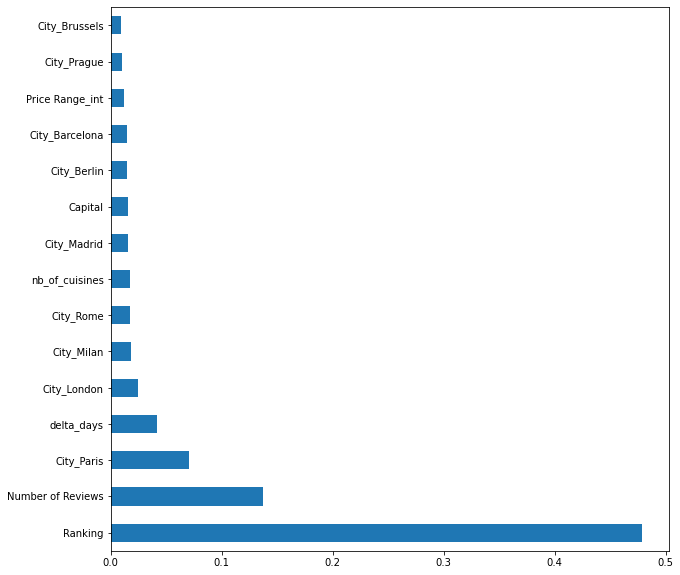

In [105]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [123]:
most_important = feat_importances.nlargest(15).index
most_important

Index(['Ranking', 'Number of Reviews', 'City_Paris', 'delta_days',
       'City_London', 'City_Milan', 'City_Rome', 'nb_of_cuisines',
       'City_Madrid', 'Capital', 'City_Berlin', 'City_Barcelona',
       'Price Range_int', 'City_Prague', 'City_Brussels'],
      dtype='object')

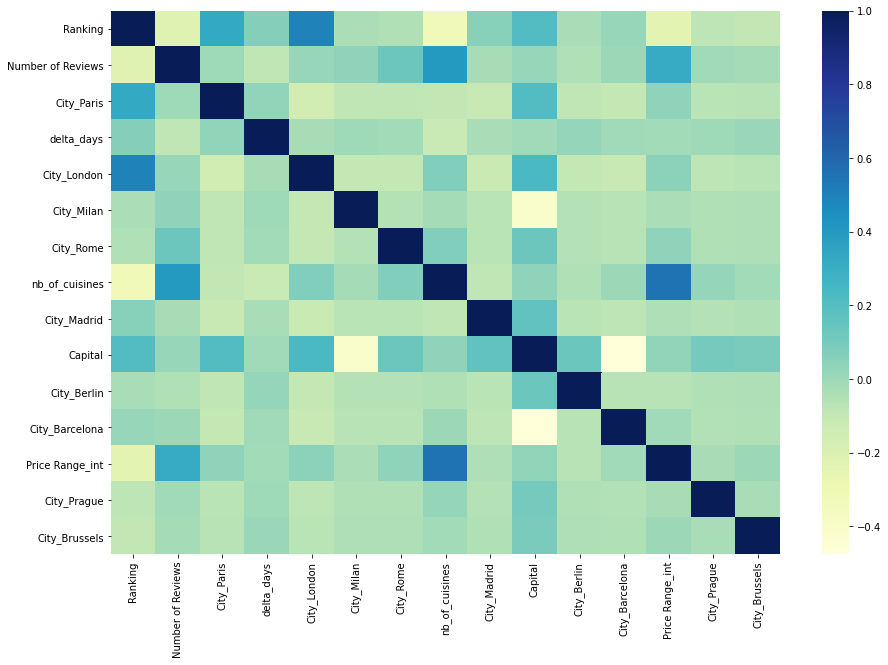

In [127]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap((df[most_important]).corr(),cmap="YlGnBu")

# Потенциальные шаги

In [128]:
# Стои ли объединить признаки 'nb_of_cuisines' и 'Price Range_int'
# Добавить параметры связанные с 'Number of Reviews',